## HW3: Handwritten digits classification

In this assignment, you will practice using artificial neural networks to perform handwritten digits classification. Specifically, you will

    - Create a NN (50 points)
        - the numbers of hidden layers
        - the number of hidden nodes 
        - activation functions
        
    - Train the network with the early stopping strategy (30 points)
        - set the validation set (20%)
        - monitor the val_accuracy to stop training early
        
    - Report the training and test accuracy (20 points)
    
**The baseline accuracy on the test set is 96.0%; and your test acc should be higher than this number. Student will earn 20 extra points if her/his test accuracy is higher than 99.0%.

In [3]:
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt #using pyplot to display images

#### Load the MNIST Datasets
MNIST handwritten digits. 60k 28*28 grayscale images of the 10 digits, along with a test set of 10k images

![Fig. 1](handwrittendigits.png)

| *Fig.1. Handwritten digits examples.* |

    1. Keras.datasets.mnist.load_data
    2. Show images using the imshow() function in pyplot
        - https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.imshow.html
    3. One-hot-vector encoding using keras.utils.to_categorical() function

Training set: (60000, 28, 28) and Training Targets: (60000,)
Test set: (10000, 28, 28) and test targets: (10000,)


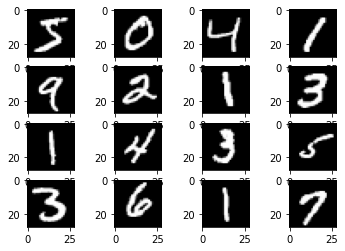

In [4]:
# load and show data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print('Training set: {} and Training Targets: {}'.format(X_train.shape, y_train.shape))
print('Test set: {} and test targets: {}'.format(X_test.shape, y_test.shape))

# show first 16 images
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i], cmap = 'Greys_r')
plt.show()

In [5]:
#2. reshape image data(28*28) to vectors (784*1)
X_train_1 = np.reshape(X_train, [X_train.shape[0], X_train.shape[1] * X_train.shape[2]])
X_test_1 = np.reshape(X_test, [X_test.shape[0], X_test.shape[1] * X_test.shape[2]])
print('training data:', X_train_1.shape, 'test data:', X_test_1.shape)
print('test_set: {} test_targets:{}'.format(X_test.shape, y_test.shape))

y_train_onehot = keras.utils.to_categorical(y_train)

training data: (60000, 784) test data: (10000, 784)
test_set: (10000, 28, 28) test_targets:(10000,)


#### Create a neural network (50 points)

- the numbers of hidden layers
- the number of hidden nodes for each hiddern layer
- activation functions
- set the optimizer
- set the loss function and metrics

In [6]:
# Create a neural network.
# add your code here
model = keras.models.Sequential() # and empty model

# creating the NN and assigning different neuron values for experimenatation
model.add(keras.layers.Dense(units = 32, input_dim= 28 * 28, activation='relu'))
model.add(keras.layers.Dense(units = 64, activation='relu'))
model.add(keras.layers.Dense(units = 128, activation='relu'))
model.add(keras.layers.Dense(units = 256, activation='relu'))
model.add(keras.layers.Dense(units = 512, activation='relu'))
model.add(keras.layers.Dense(units = 10, activation='softmax'))

#setup the optimizer

adam_opt = keras.optimizers.Adam()
model.compile(optimizer = adam_opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])




# display the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 205,290
Trainable params: 205,290
Non-trai

#### Train the network with the early stopping strategy (30 points)
- set the validation set (20%)
- monitor the val_accuracy to stop training early
- set the batches and epochs

In [7]:
# Train the model using the early stoping strategy

# specify early stopping
stop = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.001, mode='max')

# training validation at 20%
model.fit(X_train_1, y_train, epochs=15, batch_size=100, validation_split=0.2, callbacks=[stop])


Epoch 1/15
480/480 [==============================] - 6s 10ms/step - loss: 0.7834 - accuracy: 0.7968 - val_loss: 0.2826 - val_accuracy: 0.9180
Epoch 2/15
480/480 [==============================] - 5s 10ms/step - loss: 0.2492 - accuracy: 0.9259 - val_loss: 0.2115 - val_accuracy: 0.9342
Epoch 3/15
480/480 [==============================] - 5s 10ms/step - loss: 0.1859 - accuracy: 0.9431 - val_loss: 0.1987 - val_accuracy: 0.9392
Epoch 4/15
480/480 [==============================] - 5s 10ms/step - loss: 0.1552 - accuracy: 0.9530 - val_loss: 0.1911 - val_accuracy: 0.9438
Epoch 5/15
480/480 [==============================] - 5s 11ms/step - loss: 0.1331 - accuracy: 0.9598 - val_loss: 0.1806 - val_accuracy: 0.9477
Epoch 6/15
480/480 [==============================] - 5s 10ms/step - loss: 0.1209 - accuracy: 0.9633 - val_loss: 0.1710 - val_accuracy: 0.9506
Epoch 7/15
480/480 [==============================] - 5s 9ms/step - loss: 0.1081 - accuracy: 0.9672 - val_loss: 0.1779 - val_accuracy: 0.9535


#### Report the training and test accuracy (20 points)

In [8]:
# Evaluation

_, train_acc = model.evaluate(X_train_1, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_1, y_test, verbose=0)

print('training acc is', train_acc)
print('test acc is', test_acc)

training acc is 0.9709500074386597
test acc is 0.95169997215271
